## Hovmöller plot of ssh along the coast

1. Find lon index of first cell that is not land from east to west for each lat.
2. Subtract one to the lon index found to make sure it is water.
3. Find lat index of first cell that is not land from north to south for each lon.
4. Subtract one to the lat index found to make sure it is water.
5. Integrate all points so that I get good coverage of the coastline.
6. Save index in a lon indices array.
7. Plot hovmoller diagram using all lats and lon index array.

In [1]:
import cmocean as cmo
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
from matplotlib.gridspec import GridSpecFromSubplotSpec
from matplotlib.lines import Line2D
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from xmitgcm import open_mdsdataset

In [2]:
outdir = '/data/SO2/sio-kramosmusalem/exp06_512x612x100_ORL_SVB/01_SVB_febTS_output/'
outdir2 = '/data/SO2/sio-kramosmusalem/exp06_512x612x100_ORL/01_noSVB_febTS/'

levels = [1,   2,  3,  4,  5,  6,  7,  8,  9, 10, 
          11, 12, 13, 14, 15, 16, 17,
          18, 19, 20, 21, 22, 23, 24, 25,
          26, 27, 28, 29, 30, 31,
          32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44,
          45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57,              
          58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 
          74, 79, 84, 89, 94, 99,]
ds = open_mdsdataset(outdir, prefix=['eta','dynVars'], levels=levels)
ds2 = open_mdsdataset(outdir2, prefix=['eta','dynVars'], levels=levels)

In [3]:
nx = 512
ny = 612
nz = 100
nt = 720

In [4]:
depth = ds2.Depth[:]
LAT = ds2['YC'][:]
LON = ds2['XC'][:]-360
lat = ds2.YC[:,0].data
lon = ds2.XC[0,:].data-360

Z = ds2['Z'][:]
Zl = ds2['Zl'][:]

# No bay centers mask
hFacC = ds2['hFacC'][:]
hfac = np.ma.masked_values(hFacC, 0)
mask = np.ma.getmask(hfac)
dep_masked = np.ma.masked_values(depth,0)
mask_dep = np.ma.getmask(dep_masked)
time = np.arange(0,720)*600

# bay centers mask
# centers mask
depthSVB = ds.Depth[:]
hFacCSVB = ds['hFacC'][:]
hfacSVB = np.ma.masked_values(hFacCSVB, 0)
maskSVB = np.ma.getmask(hfacSVB)
dep_maskedSVB = np.ma.masked_values(depthSVB,0)
mask_depSVB = np.ma.getmask(dep_maskedSVB)

### 1. Find lon index of first water point from east to west for each lat

Find cells along lat where hFacC is 1.

In [5]:
lon_inds_off = np.argmax(np.squeeze(hFacCSVB[0,:,::-1].data), axis=1)

ini_lat_ind = 220 # Lat just above and outside SVB

lon_inds = np.ones_like(lon_inds_off[ini_lat_ind:])*nx - lon_inds_off[ini_lat_ind:]
lat_inds = np.ones_like(lon_inds)*ini_lat_ind + np.arange(len(lon_inds))

There are some points missing along the coast that have the same lat. Now find along lon:

In [6]:
lat_inds_off = np.argmax(np.squeeze(hFacCSVB[0,::-1,:].data), axis=0)
ini_lon_ind = 50 # Lon of land at N boundary

lat_inds_2 = np.ones_like(lat_inds_off[ini_lon_ind:])*ny - lat_inds_off[ini_lon_ind:]
lon_inds_2 = np.ones_like(lat_inds)*ini_lon_ind + np.arange(len(lat_inds))

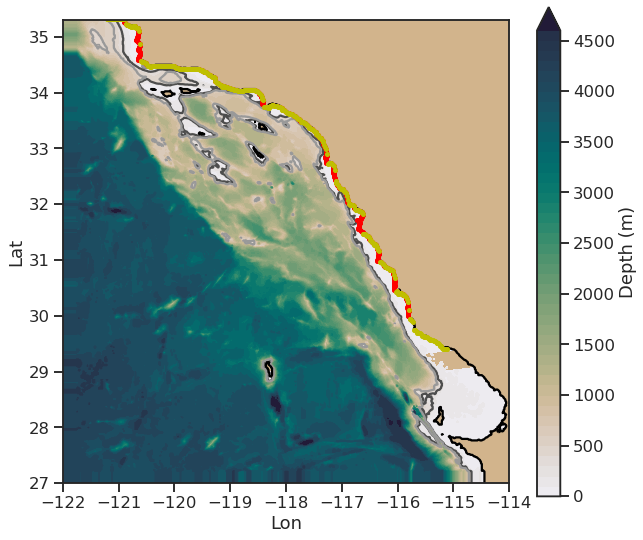

In [7]:
sns.set_style('ticks')
sns.set_context('talk')
fig, ax = plt.subplots(1,1,figsize=(10,9))
ax.set_facecolor('tan')
pc = ax.contourf(LON,LAT,np.ma.masked_array(depthSVB, mask=mask_depSVB),50,
                 vmin=0, vmax=5000, cmap=cmo.cm.rain, extend='max')
cb = plt.colorbar(pc, extend='max',label='depth / m')
cn = ax.contour(LON,LAT,depth, colors=['0.3','0.6'], 
                levels=[250,500])

ax.contour(lon,lat,depthSVB[:,:], levels=[0], colors='k')

# cells along coast(ish)
for ii,jj in zip(lon_inds,lat_inds):
    ax.plot(LON[0,ii-1],LAT[jj,0],'o', 
            markersize=4, color='r')
    #print('Depth at cell is %1.2f m' % (depth[jj,ii-1]))

# cells along coast(ish)
for ii,jj in zip(lon_inds_2,lat_inds_2):
    ax.plot(LON[0,ii],LAT[jj-1,0],'o', 
            markersize=4, color='y')
    #print('Depth at cell is %1.2f m' % (depth[jj,ii-1]))

cb.set_label('Depth (m)')
ax.set_xlabel('Lon')
ax.set_ylabel('Lat')
ax.set_xlim(238-360, 246-360)
ax.set_ylim(27,35.3)
ax.set_aspect(1)

In [17]:
#for lon,lat in zip(lon_inds, lat_inds):
#    print("%d   %d" %(lon, lat))

397   220
397   221
397   222
397   223
397   224
397   225
397   226
398   227
398   228
397   229
397   230
396   231
396   232
397   233
397   234
397   235
397   236
397   237
397   238
397   239
396   240
396   241
396   242
395   243
395   244
395   245
394   246
393   247
392   248
391   249
389   250
385   251
384   252
384   253
381   254
381   255
381   256
381   257
381   258
381   259
382   260
382   261
381   262
381   263
381   264
382   265
382   266
381   267
381   268
381   269
382   270
381   271
381   272
381   273
381   274
380   275
380   276
380   277
380   278
380   279
379   280
377   281
376   282
374   283
372   284
371   285
370   286
370   287
369   288
368   289
367   290
366   291
363   292
362   293
362   294
363   295
363   296
363   297
363   298
363   299
363   300
364   301
364   302
364   303
363   304
364   305
364   306
363   307
362   308
362   309
361   310
361   311
360   312
360   313
360   314
359   315
357   316
356   317
356   318
355   319


In [21]:

#for lon,lat in zip(lon_inds_2[::-1], lat_inds_2[::-1]):
#    print("%d   %d" %(lon, lat))

441   612
440   612
439   612
438   108
437   111
436   112
435   114
434   115
433   115
432   115
431   120
430   122
429   123
428   123
427   123
426   122
425   122
424   123
423   125
422   126
421   127
420   127
419   130
418   132
417   133
416   134
415   137
414   138
413   140
412   141
411   141
410   141
409   142
408   142
407   142
406   145
405   146
404   145
403   147
402   151
401   154
400   155
399   155
398   155
397   155
396   155
395   157
394   160
393   161
392   161
391   162
390   163
389   164
388   165
387   166
386   167
385   168
384   170
383   171
382   171
381   174
380   175
379   175
378   176
377   176
376   176
375   177
374   176
373   178
372   179
371   178
370   178
369   178
368   178
367   178
366   178
365   179
364   181
363   182
362   184
361   185
360   186
359   186
358   187
357   188
356   188
355   189
354   189
353   189
352   189
351   190
350   191
349   192
348   193
347   193
346   193
345   193
344   194
343   194
342   195


In [32]:
# Sorting the array pair (list pair) takes very long 
#zipped_arr = zip(lat_inds_2,lon_inds_2) 
#sorted_zipped_arr = sorted(zipped_arr, reverse=True) # order according to lat, descending



71 612
70 612
69 612
68 612
67 612
66 612
65 612
64 612
63 612
62 612
61 612
60 612
59 612
58 612
57 612
56 612
55 612
54 612
53 612
52 612
51 612
50 612
72 606
73 605
75 604
74 604
82 603
81 603
80 603
77 603
76 603
83 602
79 602
78 602
85 601
84 601
86 600
87 597
88 580
90 557
89 557
93 556
92 556
91 556
94 555
95 554
96 552
123 551
121 551
120 551
119 551
118 551
117 551
116 551
115 551
114 551
113 551
112 551
111 551
109 551
108 551
107 551
97 551
127 550
126 550
125 550
124 550
122 550
110 550
106 550
105 550
104 550
103 550
102 550
99 550
98 550
129 549
128 549
101 549
100 549
132 548
131 548
130 548
154 547
153 547
152 547
151 547
150 547
149 547
148 547
141 547
140 547
139 547
138 547
136 547
135 547
134 547
133 547
156 546
155 546
147 546
146 546
145 546
144 546
143 546
142 546
137 546
159 545
158 545
157 545
161 544
160 544
162 543
164 542
163 542
165 541
166 540
168 539
167 539
169 538
170 537
173 536
172 536
171 536
174 535
175 531
176 529
178 528
177 528
179 527
180 526
18

In [33]:
#for ii in sorted_zipped_arr[::-1]:
#    print('%d %d' %(ii[1], ii[0])) # print lon, lat

436 178
437 178
438 178
439 178
440 178
441 178
435 179
434 181
433 182
432 184
431 185
429 186
430 186
428 187
426 188
427 188
422 189
423 189
424 189
425 189
421 190
420 191
419 192
415 193
416 193
417 193
418 193
413 194
414 194
412 195
411 197
408 198
410 198
407 199
409 199
406 200
405 201
403 202
404 202
402 213
401 215
400 216
398 217
399 217
397 229
396 240
395 243
394 246
393 247
392 248
391 249
385 250
386 250
389 250
390 250
387 251
388 251
384 252
382 253
383 254
381 271
380 275
379 280
377 281
378 281
376 282
374 283
375 283
372 284
373 284
371 285
370 286
369 288
368 289
367 290
366 291
364 292
365 292
363 307
362 308
361 310
360 312
357 314
359 315
358 316
356 317
355 319
354 320
353 321
352 322
351 325
350 326
349 327
348 328
345 329
346 329
347 329
344 356
342 358
343 358
340 359
341 359
339 360
336 361
337 361
338 361
335 362
334 366
330 367
331 367
332 367
333 367
329 368
328 369
327 374
326 379
325 383
324 385
323 386
322 387
319 388
320 388
321 388
318 389
317 391


In [8]:
df = pd.read_csv('coastline_points_list.txt',names=['lon_ii','lat_jj'], header=1 )

397 221 Depth at cell is 4.00 m
397 222 Depth at cell is 4.00 m
397 223 Depth at cell is 6.00 m
397 224 Depth at cell is 6.00 m
397 225 Depth at cell is 8.00 m
397 226 Depth at cell is 6.00 m
398 226 Depth at cell is 0.00 m
398 228 Depth at cell is 4.00 m
397 229 Depth at cell is 20.00 m
397 230 Depth at cell is 10.00 m
396 231 Depth at cell is 26.20 m
396 232 Depth at cell is 20.00 m
397 233 Depth at cell is 2.00 m
397 234 Depth at cell is 4.00 m
397 235 Depth at cell is 4.00 m
397 236 Depth at cell is 4.00 m
397 237 Depth at cell is 4.00 m
397 238 Depth at cell is 6.00 m
397 239 Depth at cell is 4.00 m
396 240 Depth at cell is 17.20 m
396 241 Depth at cell is 12.20 m
396 242 Depth at cell is 6.00 m
395 243 Depth at cell is 14.60 m
395 244 Depth at cell is 12.20 m
395 245 Depth at cell is 8.00 m
394 246 Depth at cell is 17.20 m
393 247 Depth at cell is 17.20 m
392 248 Depth at cell is 17.20 m
391 249 Depth at cell is 12.20 m
385 250 Depth at cell is 2.00 m
386 250 Depth at cell is 4.0

300 446 Depth at cell is 33.50 m
300 447 Depth at cell is 20.00 m
300 448 Depth at cell is 12.20 m
300 449 Depth at cell is 6.00 m
299 450 Depth at cell is 20.00 m
298 451 Depth at cell is 47.00 m
298 452 Depth at cell is 23.00 m
297 453 Depth at cell is 29.70 m
297 454 Depth at cell is 12.20 m
296 455 Depth at cell is 14.60 m
295 456 Depth at cell is 14.60 m
294 457 Depth at cell is 14.60 m
294 458 Depth at cell is 8.00 m
293 459 Depth at cell is 12.20 m
292 460 Depth at cell is 12.20 m
291 461 Depth at cell is 14.60 m
291 462 Depth at cell is 10.00 m
290 463 Depth at cell is 10.00 m
289 464 Depth at cell is 12.20 m
288 465 Depth at cell is 12.20 m
287 466 Depth at cell is 14.60 m
287 467 Depth at cell is 8.00 m
285 468 Depth at cell is 12.20 m
286 468 Depth at cell is 12.20 m
283 469 Depth at cell is 14.60 m
284 469 Depth at cell is 10.00 m
282 470 Depth at cell is 14.60 m
281 471 Depth at cell is 14.60 m
281 472 Depth at cell is 12.20 m
280 473 Depth at cell is 10.00 m
279 474 Depth

86 587 Depth at cell is 6.00 m
87 588 Depth at cell is 2.00 m
87 589 Depth at cell is 4.00 m
87 590 Depth at cell is 6.00 m
87 591 Depth at cell is 8.00 m
87 592 Depth at cell is 10.00 m
87 593 Depth at cell is 10.00 m
88 594 Depth at cell is 2.00 m
88 595 Depth at cell is 4.00 m
88 596 Depth at cell is 4.00 m
87 597 Depth at cell is 14.60 m
87 598 Depth at cell is 12.20 m
87 599 Depth at cell is 10.00 m
86 600 Depth at cell is 20.00 m
84 601 Depth at cell is 26.20 m
85 601 Depth at cell is 10.00 m
78 602 Depth at cell is 20.00 m
79 602 Depth at cell is 8.00 m
83 602 Depth at cell is 33.50 m
76 603 Depth at cell is 17.20 m
77 603 Depth at cell is 12.20 m
80 603 Depth at cell is 2.00 m
81 603 Depth at cell is 8.00 m
82 603 Depth at cell is 8.00 m
74 604 Depth at cell is 37.70 m
75 604 Depth at cell is 20.00 m
73 605 Depth at cell is 33.50 m
72 606 Depth at cell is 37.70 m
71 607 Depth at cell is 33.50 m
71 608 Depth at cell is 12.20 m
71 609 Depth at cell is 4.00 m
71 610 Depth at cell 

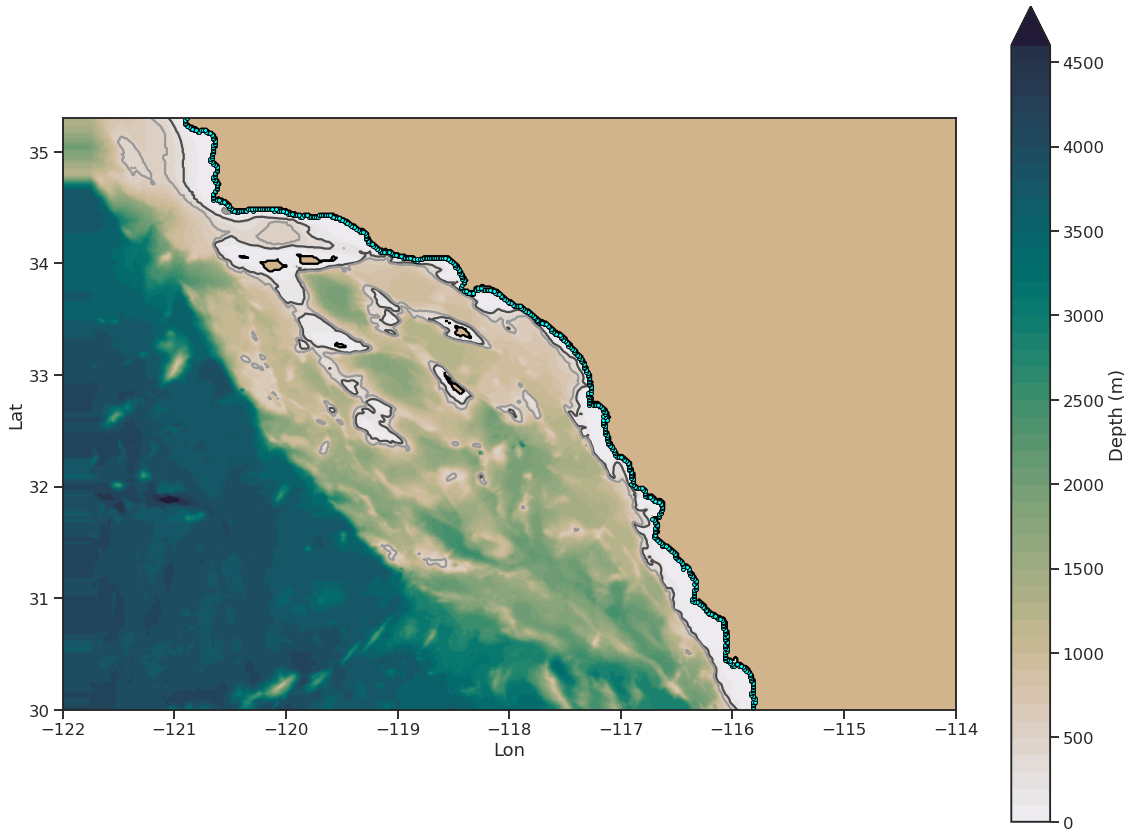

In [9]:
sns.set_style('ticks')
sns.set_context('talk')
fig, ax = plt.subplots(1,1,figsize=(20,15))
ax.set_facecolor('tan')
pc = ax.contourf(LON,LAT,np.ma.masked_array(depthSVB, mask=mask_depSVB),50,
                 vmin=0, vmax=5000, cmap=cmo.cm.rain, extend='max')
cb = plt.colorbar(pc, extend='max',label='depth / m')
cn = ax.contour(LON,LAT,depth, colors=['0.3','0.6'], 
                levels=[250,500])

ax.contour(lon,lat,depthSVB[:,:], levels=[0], colors='k')

# cells along coast(ish)
for ii,jj in zip(df.lon_ii[:], df.lat_jj[:]):
    #print(ii,jj)
    ax.plot(LON[0,int(ii)-1],LAT[int(jj)-1,0],'o', 
            markersize=4, color='cyan', markeredgecolor='k')
    print('%d %d Depth at cell is %1.2f m' % (int(ii),int(jj),depth[jj-1,ii-1]))

cb.set_label('Depth (m)')
ax.set_xlabel('Lon')
ax.set_ylabel('Lat')
ax.set_xlim(238-360, 246-360)
ax.set_ylim(30,35.3)
ax.set_aspect(1)

### Hovmöller 

In [10]:
lon_ii = np.array(df.lon_ii[:])-np.ones_like(df.lon_ii)
lat_jj = np.array(df.lat_jj[:])-np.ones_like(df.lat_jj)

In [11]:
# Distance along the coast (haversine)
def distance(lat1,lon1,lat2,lon2):
    '''Distance Haversine using formula'''
    r = 6371 #radius of Earth (KM)
    p = np.pi/180  #Pi/180
    a = 0.5 - np.cos((lat2-lat1)*p)/2 + np.cos(lat1*p)*np.cos(lat2*p) * (1-np.cos((lon2-lon1)*p)) / 2
    d = 2 * r * np.arcsin(np.sqrt(a)) #2*R*asin In km
    return d

In [12]:
dist_array = np.zeros(len(lon_ii))

for kk in range(1,len(lon_ii)):
    lat1 = lat[lat_jj[kk-1]]
    lon1 = lon[lon_ii[kk-1]]
    lat2 = lat[lat_jj[kk]]
    lon2 = lon[lon_ii[kk]]
    dist_array[kk]=  distance(lat1, lon1, lat2, lon2)

In [13]:
dist_cummul = np.cumsum(dist_array)

In [14]:
# This cell takes a while (about 10 min)
ssh = np.zeros((nt,len(lon_ii)))

for ii,jj,kk in zip(lon_ii, lat_jj, range(len(lon_ii))):
    ssh[:,kk] = ds['ETAN'][:,jj,ii]

In [15]:
print('%1.1e' %distance(lat1,lon1,lat2,lon2))

2.1e+00


Text(0.5, 1.0, 'SVB run')

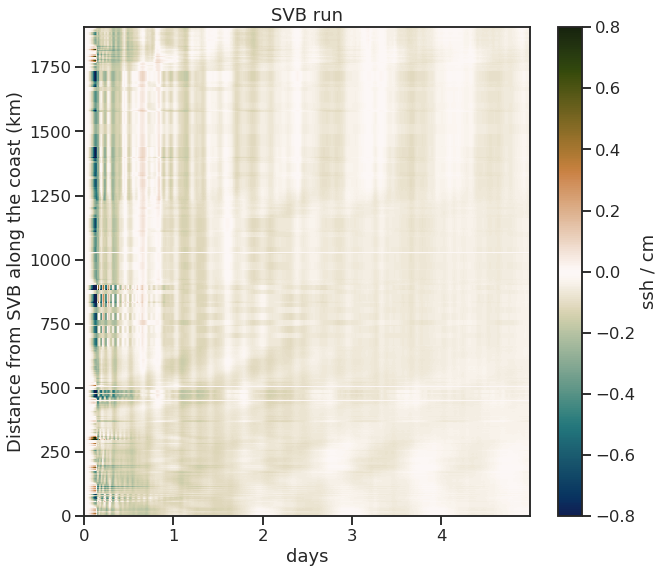

In [16]:
time = np.arange(720)*600

sns.set_style('ticks')
sns.set_context('talk')

fig, ax = plt.subplots(1,1,figsize=(10,9))
ax.set_facecolor('tan')

pc = ax.pcolormesh(time/(3600*24),dist_cummul,np.transpose(ssh*100),
                   vmin=-0.8, vmax=0.8, cmap=cmo.cm.tarn_r)
cb = plt.colorbar(pc,label='ssh / cm')
ax.set_ylabel('Distance from SVB along the coast (km)')
ax.set_xlabel('days')
ax.set_title('SVB run')

Text(0.5, 1.0, 'SVB run')

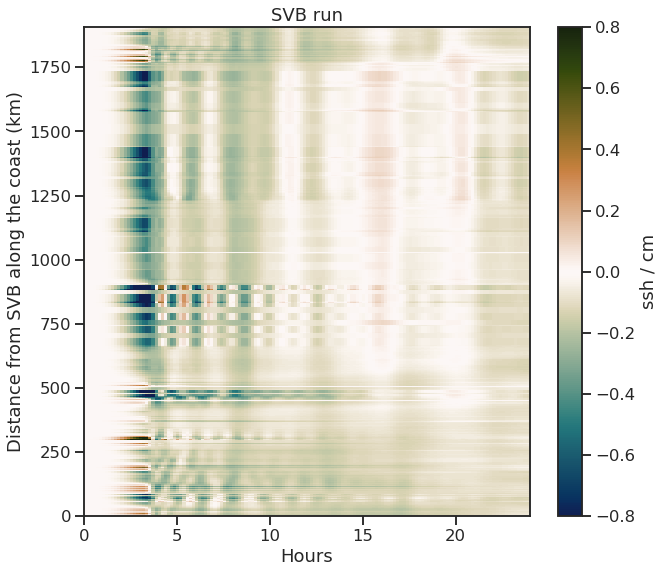

In [17]:
time = np.arange(720)*600

sns.set_style('ticks')
sns.set_context('talk')

fig, ax = plt.subplots(1,1,figsize=(10,9))
ax.set_facecolor('tan')

pc = ax.pcolormesh(time/(3600),dist_cummul,np.transpose(ssh*100),
                   vmin=-0.8, vmax=0.8, cmap=cmo.cm.tarn_r)
cb = plt.colorbar(pc,label='ssh / cm')
ax.set_xlim(0,24)
ax.set_ylabel('Distance from SVB along the coast (km)')
ax.set_xlabel('Hours')
ax.set_title('SVB run')

## No SVB run

In [18]:
# This cell takes a while (about 10 min)
ssh_NOB = np.zeros((nt,len(lon_ii)))

for ii,jj,kk in zip(lon_ii, lat_jj, range(len(lon_ii))):
    ssh_NOB[:,kk] = ds2['ETAN'][:,jj,ii]

Text(0.5, 1.0, 'No SVB run')

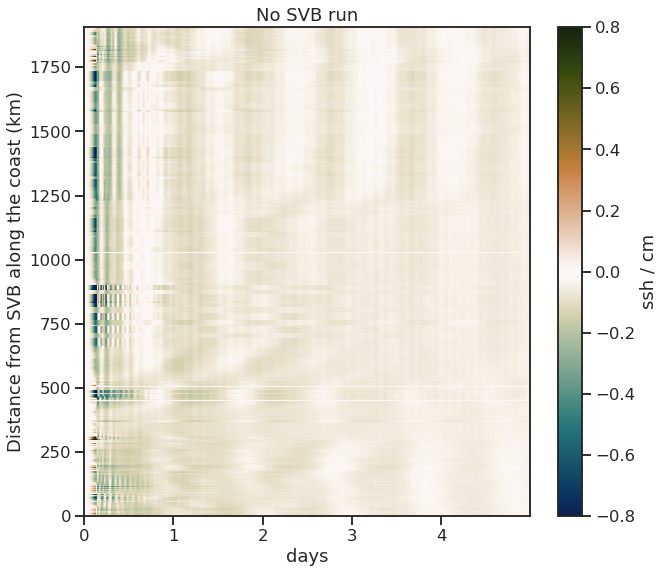

In [19]:
time = np.arange(720)*600

sns.set_style('ticks')
sns.set_context('talk')

fig, ax = plt.subplots(1,1,figsize=(10,9))
ax.set_facecolor('tan')

pc = ax.pcolormesh(time/(3600*24),dist_cummul,np.transpose(ssh_NOB*100),
                   vmin=-0.8, vmax=0.8, cmap=cmo.cm.tarn_r)
cb = plt.colorbar(pc,label='ssh / cm')
ax.set_ylabel('Distance from SVB along the coast (km)')
ax.set_xlabel('days')
ax.set_title('No SVB run')

Text(0.5, 1.0, 'No SVB run')

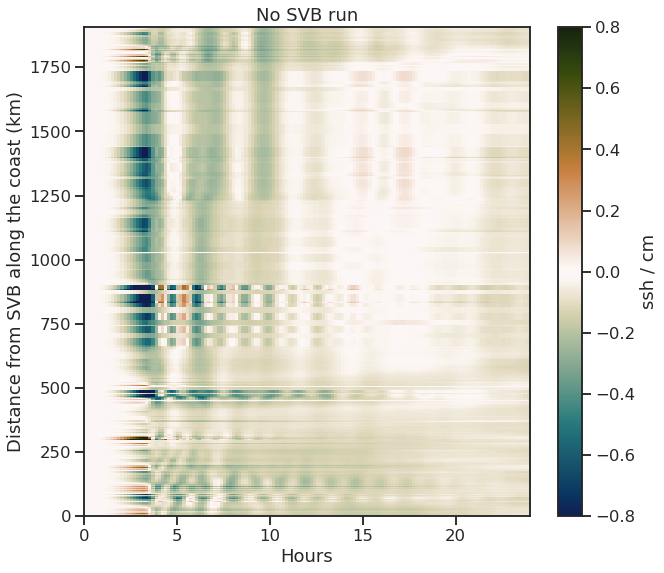

In [20]:
sns.set_style('ticks')
sns.set_context('talk')

fig, ax = plt.subplots(1,1,figsize=(10,9))
ax.set_facecolor('tan')

pc = ax.pcolormesh(time/(3600),dist_cummul,np.transpose(ssh_NOB*100),
                   vmin=-0.8, vmax=0.8, cmap=cmo.cm.tarn_r)
cb = plt.colorbar(pc,label='ssh / cm')
ax.set_xlim(0,24)
ax.set_ylabel('Distance from SVB along the coast (km)')
ax.set_xlabel('Hours')
ax.set_title('No SVB run')

## Bay minus no Bay 

Text(0.5, 1.0, 'SVB-No SVB')

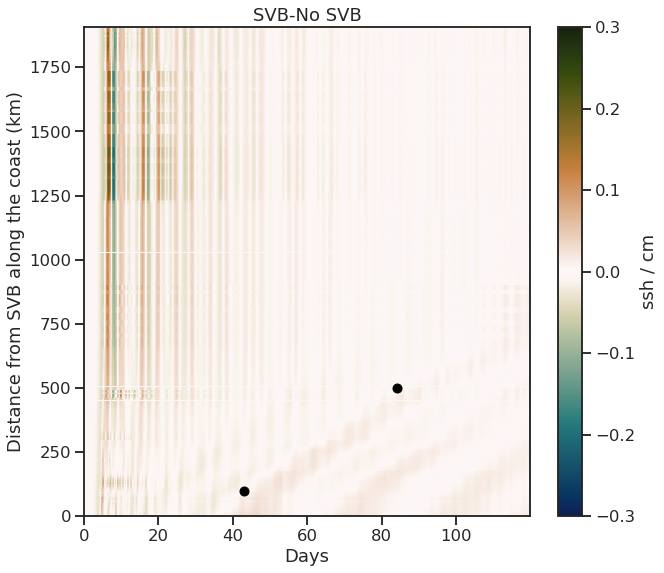

In [21]:
time = np.arange(720)*600

sns.set_style('ticks')
sns.set_context('talk')

fig, ax = plt.subplots(1,1,figsize=(10,9))
ax.set_facecolor('tan')

pc = ax.pcolormesh(time/(3600),dist_cummul,np.transpose((ssh-ssh_NOB)*100),
                   vmin=-0.3, vmax=0.3, cmap=cmo.cm.tarn_r)
cb = plt.colorbar(pc,label='ssh / cm')
ax.plot(43,100,'ko')
ax.plot(84,500, 'ko')

ax.set_ylabel('Distance from SVB along the coast (km)')
ax.set_xlabel('Days')
ax.set_title('SVB-No SVB')

Text(0.5, 1.0, 'SVB-No SVB')

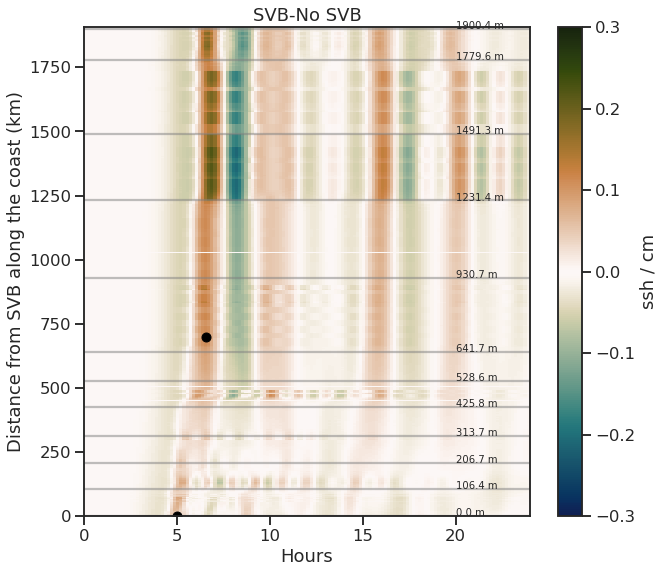

In [22]:
time = np.arange(720)*600

sns.set_style('ticks')
sns.set_context('talk')

fig, ax = plt.subplots(1,1,figsize=(10,9))
ax.set_facecolor('tan')

pc = ax.pcolormesh(time/(3600),dist_cummul,np.transpose((ssh-ssh_NOB)*100),
                   vmin=-0.3, vmax=0.3, cmap=cmo.cm.tarn_r)
cb = plt.colorbar(pc,label='ssh / cm')


# cells along coast(ish)
for kk in range(len(lon_ii)):
    if kk%50 == 0:
        ax.axhline(dist_cummul[kk],color='0.5',alpha=0.5)
        ax.text(20,dist_cummul[kk],'%1.1f m' %dist_cummul[kk], fontsize=10)

ax.plot(5,0,'ko')
ax.plot(6.6,700, 'ko')
ax.set_xlim(0,24)
ax.set_ylabel('Distance from SVB along the coast (km)')
ax.set_xlabel('Hours')
ax.set_title('SVB-No SVB')

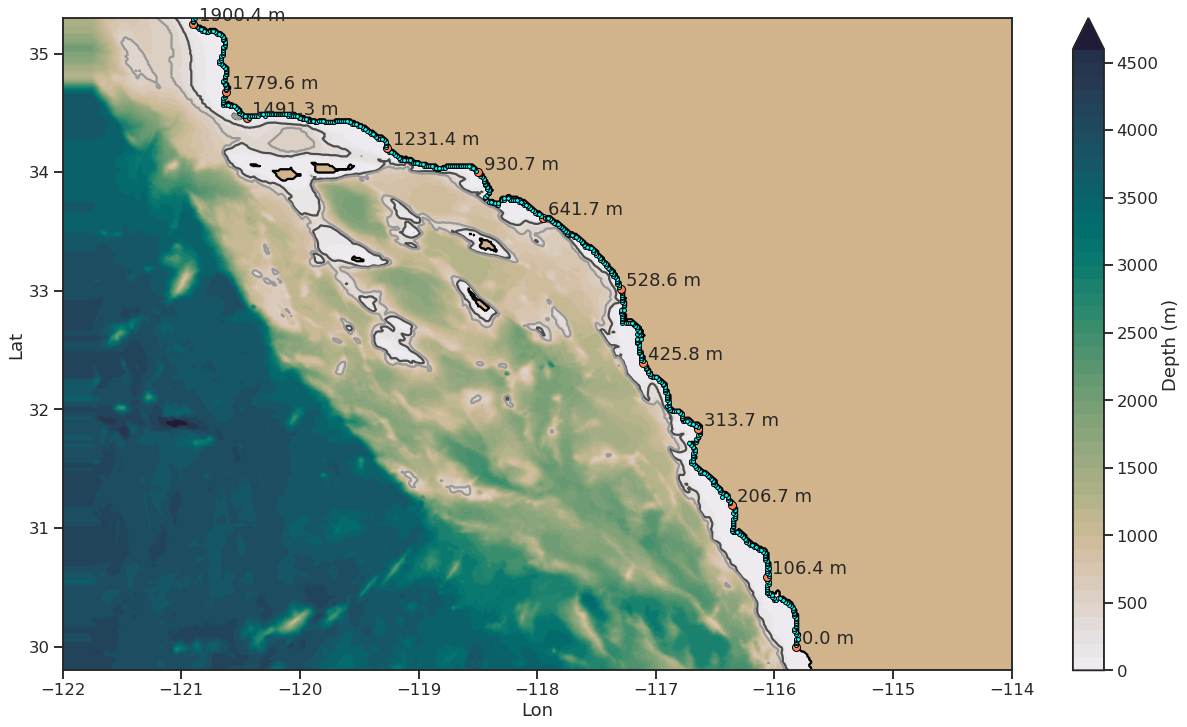

In [28]:
sns.set_style('ticks')
sns.set_context('talk')
fig, ax = plt.subplots(1,1,figsize=(22,12))
ax.set_facecolor('tan')
pc = ax.contourf(LON,LAT,np.ma.masked_array(depthSVB, mask=mask_depSVB),50,
                 vmin=0, vmax=5000, cmap=cmo.cm.rain, extend='max')
cb = plt.colorbar(pc, extend='max',label='depth / m')
cn = ax.contour(LON,LAT,depth, colors=['0.3','0.6'], 
                levels=[250,500])

ax.contour(lon,lat,depthSVB[:,:], levels=[0], colors='k')

# cells along coast(ish)
for ii,jj,kk in zip(lon_ii[:], lat_jj[:],range(len(lon_ii))):
    #print(ii,jj)
    ax.plot(LON[0,int(ii)],LAT[int(jj),0],'o', 
            markersize=4, color='cyan', markeredgecolor='k')
    if kk%50 == 0:
        ax.plot(LON[0,int(ii)],LAT[int(jj),0],'o', 
                markersize=8, color='coral', markeredgecolor='k')
        ax.text(LON[0,int(ii)+3],LAT[int(jj)+2,0],'%1.1f m' %dist_cummul[kk])

cb.set_label('Depth (m)')
ax.set_xlabel('Lon')
ax.set_ylabel('Lat')
ax.set_xlim(238-360, 246-360)
ax.set_ylim(29.8,35.3)
ax.set_aspect(1)

Text(0.5, 1.0, 'SVB-No SVB')

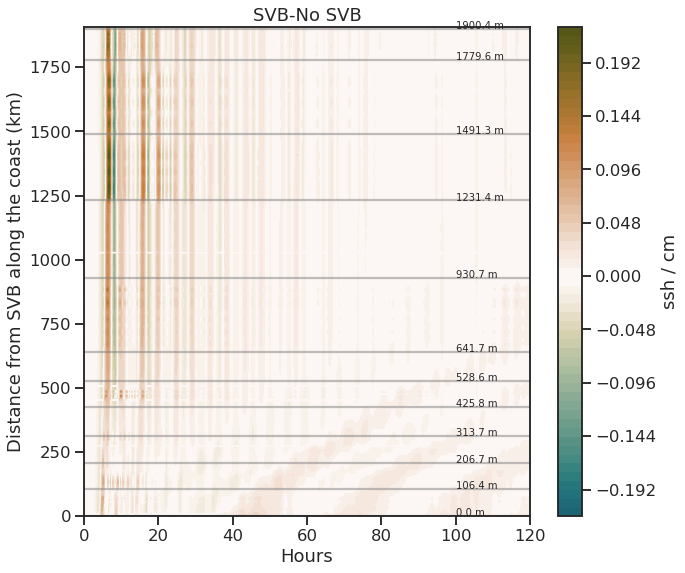

In [24]:
time = np.arange(720)*600

sns.set_style('ticks')
sns.set_context('talk')

fig, ax = plt.subplots(1,1,figsize=(10,9))
ax.set_facecolor('tan')

pc = ax.contourf(time/(3600),dist_cummul,np.transpose((ssh-ssh_NOB)*100), 61,
                vmin=-0.3, vmax=0.3, cmap=cmo.cm.tarn_r)
cb = plt.colorbar(pc,label='ssh / cm')


# cells along coast(ish)
for kk in range(len(lon_ii)):
    if kk%50 == 0:
        ax.axhline(dist_cummul[kk],color='0.5',alpha=0.5)
        ax.text(20*5,dist_cummul[kk],'%1.1f m' %dist_cummul[kk], fontsize=10)

ax.set_xlim(0,24*5)
ax.set_ylabel('Distance from SVB along the coast (km)')
ax.set_xlabel('Hours')
ax.set_title('SVB-No SVB')

Text(0.5, 1.0, 'SVB-No SVB')

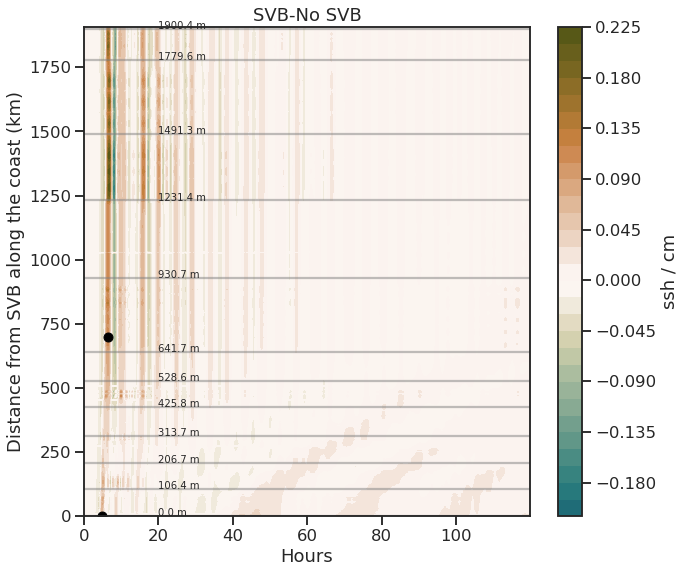

In [25]:
time = np.arange(720)*600

sns.set_style('ticks')
sns.set_context('talk')

fig, ax = plt.subplots(1,1,figsize=(10,9))
ax.set_facecolor('tan')

pc = ax.contourf(time/(3600),dist_cummul,np.transpose((ssh-ssh_NOB)*100), 41,
                vmin=-0.3, vmax=0.3, cmap=cmo.cm.tarn_r)
cb = plt.colorbar(pc,label='ssh / cm')


# cells along coast(ish)
for kk in range(len(lon_ii)):
    if kk%50 == 0:
        ax.axhline(dist_cummul[kk],color='0.5',alpha=0.5)
        ax.text(20,dist_cummul[kk],'%1.1f m' %dist_cummul[kk], fontsize=10)

ax.plot(5,0,'ko')
ax.plot(6.6,700, 'ko')
ax.set_xlim(0,)
ax.set_ylabel('Distance from SVB along the coast (km)')
ax.set_xlabel('Hours')
ax.set_title('SVB-No SVB')

In [26]:
400/(84-43) # km/h

9.75609756097561

In [27]:
9.7/3.6

2.694444444444444